# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from pathlib import Path
import requests
import matplotlib.pyplot as plt

# Getting the Dataset

### Uncomment the following lines of code to get the dataset downloaded

In [2]:
# if Path('placement.csv').is_file():
#     print("placement.csv already exists, skipping download...")
# else:
#     print("Downloading placement.csv")
#     request=requests.get("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day48-simple-linear-regression/placement.csv")
#     with open('placement.csv') as f:
#         f.write(request.content)

In [3]:
df = pd.read_csv("placement.csv")

# Visualizing the Dataset

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


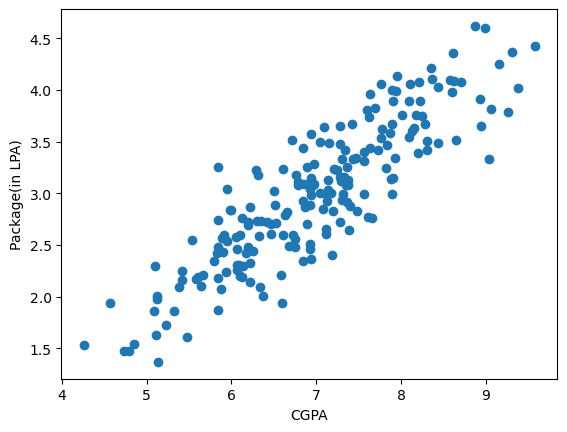

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package(in LPA)")
plt.show()

# Formatting and splitting the dataset

In [6]:
X=df.iloc[:,0].values
y=df.iloc[:,1].values

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.shape

(160,)

# Making a Linear Regression Model

In [9]:
class LRfromScratch():
    
    def __init__(self):
        self.m=None
        self.b=None
    
    def fit(self,X_train,y_train):
        numerator=0
        denominator=0
        for i in range(X_train.shape[0]):
            numerator = numerator + ((X_train[i]-X_train.mean())*(y_train[i] - y_train.mean()))
            denominator = denominator + (X_train[i]-X_train.mean())**2
        self.m=numerator/denominator
        self.b= y_train.mean() - ((self.m)*(X_train.mean()))
        print(self.m)
        print(self.b)
    
    def predict(self,X_test):
        self.package=(self.m * X_test) + self.b
        return self.package
    
    def show_predict(self,X_test):
        package=self.predict(X_test)
        print(f"CGPA: {X_test}")
        print(f"Package: {package}")
        
    def best_fit_line(self,X_train,model):
        self.line_arr = []
        for i in range(X_train.shape[0]):
            pack = model.predict(X_train[i])
            self.line_arr = np.append(self.line_arr,[pack])
        return self.line_arr 
    
    def plot_reg(self,data,X_train,model):
        line=self.best_fit_line(X_train,model)
        plt.scatter(data['cgpa'],data['package'])
        plt.plot(X_train,line,color='red')
        plt.xlabel("CGPA")
        plt.ylabel("Package")

# Instantiating and training the Model

In [10]:
linearReg = LRfromScratch()

In [11]:
linearReg.fit(X_train,y_train)

0.5742564727019197
-1.0270069374542108


# Predicting on the trained Model

In [12]:
linearReg.show_predict(X_test[0])

CGPA: 6.63
Package: 2.7803134765595168


# Plotting the regression line

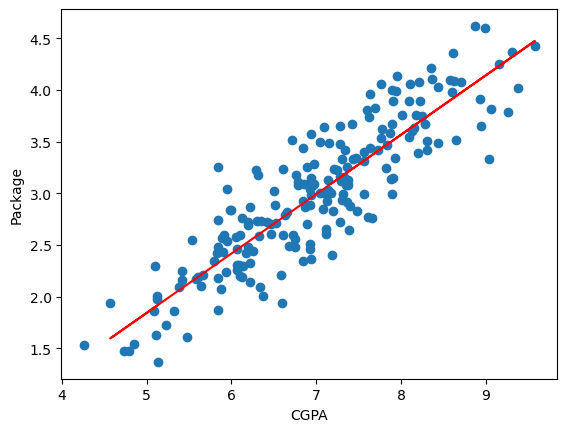

In [13]:
linearReg.plot_reg(df,X_train,linearReg)

# Plot the predicted values with the original ones

In [14]:
def plot_predict(X_test,y_test):
    prediction=linearReg.best_fit_line(X_test,linearReg)
    plt.figure(figsize=(10,7))
    plt.scatter(X_test,y_test,c='r',label='Testing')
    plt.scatter(X_test,prediction,c='g',label='Prediction')
    plt.legend(prop={'size':14})

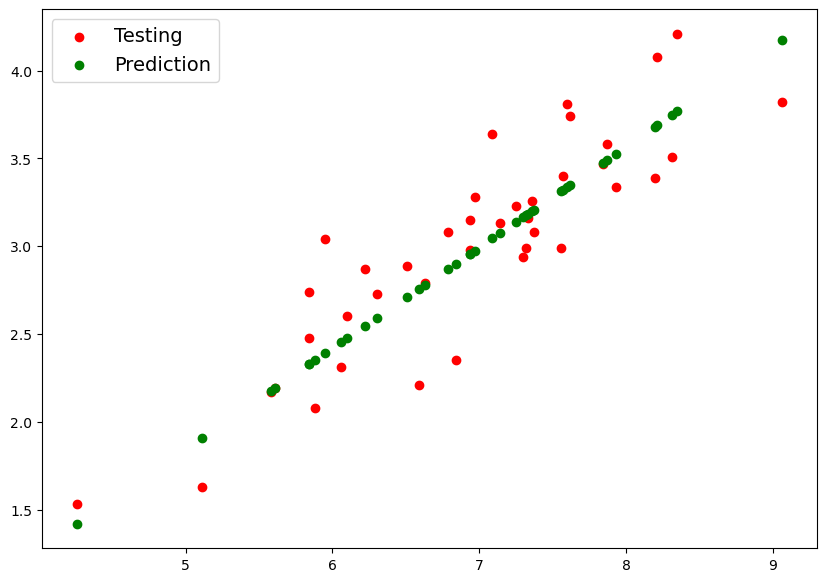

In [15]:
plot_predict(X_test,y_test)